# Complete Linkage clustering

### Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Distance function

In [2]:
def dist(cls1,cls2):
    far_dist = -np.inf
    # for each point in each cluster
    for row1 in cls1:
        for row2 in cls2:
            # make sure that our furthest distance holds the maximum distance betweeen the clusters at focus
            if far_dist < distance.euclidean(row1,row2):
                far_dist = distance.euclidean(row1,row2)
    return far_dist

### Complete linkage function

In [3]:
def complete_linkage(cls ,n_cls):
    while (len(cls)-n_cls != 0):
        # Clustering
        close_dist = np.inf
        clust_1 = clust_2 = None
        # for every cluster (until second last element)
        for id1, cls1 in enumerate(cls[:len(cls)]): 
            for id2, cls2 in enumerate(cls[(id1 + 1):]):
                far_dist = dist(cls1,cls2)
                if far_dist < close_dist:
                    clust_1 = id1
                    clust_2 = id1 + id2 + 1
                    close_dist = far_dist
               # extend just appends the contents to the list without flattening it out
        cls[clust_1].extend(cls[clust_2]) 
        # don't need this index anymore, and we have just clustered once more
        cls.pop(clust_2) 
    return cls

### Hierarchical function

In [4]:
def hierarchical(df, n_cls):
    d = df.values
    init = []
    for row in d:
        init.append([row.tolist()])
    return complete_linkage(init, n_cls)

### Load the data

In [5]:
data = pd.read_csv('data_mvnorm2mix.csv',names=['x0', 'x1'])
X_train, X_test= train_test_split(np.array(data),  test_size=0.1, random_state=1234)
df = pd.DataFrame(X_test,columns=['x0', 'x1'])

### Clustering

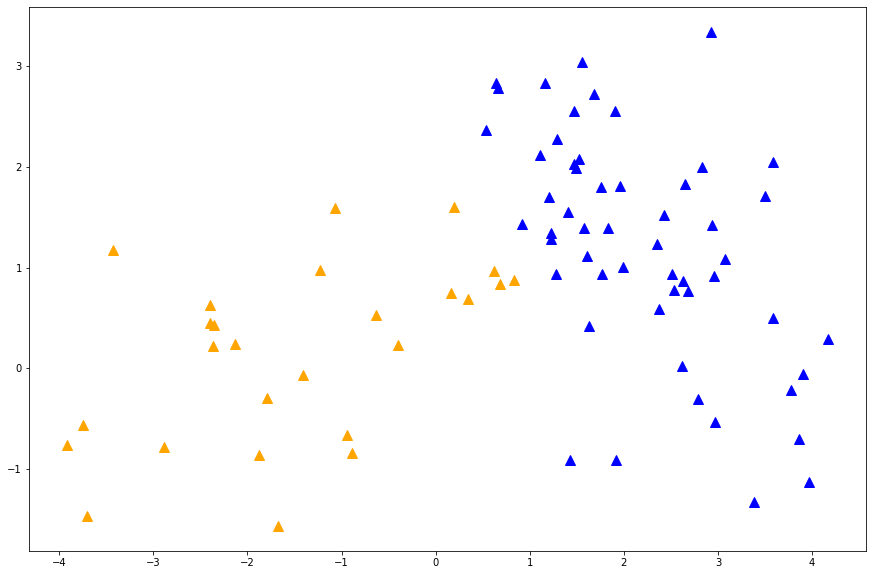

In [6]:
clusters = hierarchical(df,2)
colors = ['orange', 'blue']
plt.figure(figsize=(15,10))
for cluster_index, cluster in enumerate(clusters):
    for point in cluster:
        plt.plot([point[0]], [point[1]], marker='^', markersize=10, color=colors[cluster_index])